In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### 관광업 휴무일, 영업시간

In [2]:
year2020_1 = pd.read_excel('2020년관광산업특수분류.xlsx')
year2020_2 = pd.read_excel('2020년관광진흥법기준.xlsx')

year2021_1 = pd.read_excel('2021년관광산업관광진흥법기준 .xlsx')
year2021_2 = pd.read_excel('2021년관광산업특수분류기준.xlsx')

In [37]:
year2020_11 = year2020_1[['Q8_2','Q8_3_1','Q8_3_2']] #이상치 없음
year2020_22 = year2020_2[['Q8_2','Q8_3_1','Q8_3_2']] # 이상치 5812,5813

year2021_11 = year2021_1[['Q8_2','Q8_3_1','Q8_3_2']]
year2021_22 = year2021_2[['Q8_2','Q8_3_1','Q8_3_2']]

In [51]:
# 휴무일 여부  1 없음  , 2 있음  , 3 모름
year2020_11 = year2020_11.rename(columns={'Q8_2': '일일영업시간','Q8_3_1':'휴무일여부', 'Q8_3_2':'휴무일수'})
year2020_22 = year2020_22.rename(columns={'Q8_2': '일일영업시간','Q8_3_1':'휴무일여부', 'Q8_3_2':'휴무일수'})
year2021_11 = year2021_11.rename(columns={'Q8_2': '일일영업시간','Q8_3_1':'휴무일여부', 'Q8_3_2':'휴무일수'})
year2021_22 = year2021_22.rename(columns={'Q8_2': '일일영업시간','Q8_3_1':'휴무일여부', 'Q8_3_2':'휴무일수'})

In [94]:
year2021_11[(year2021_11['휴무일여부'] == 2) & (year2021_11['휴무일수'] >= 1)]

,일일영업시간,휴무일여부,휴무일수
0,8,2,8
1,8,2,8
2,8,2,30
3,8,2,8
4,8,2,8
...,...,...,...
7200,8,2,4
7206,9,2,8
7207,10,2,4
7208,10,2,4


In [101]:
year2020_11.to_excel('2020_특수.xlsx', index=False)
year2020_22.to_excel('2020_진흥법.xlsx', index=False)
year2021_11.to_excel('2021_진흥법.xlsx', index=False)
year2021_22.to_excel('2021_특수.xlsx', index=False)

### 휴무일, 영업시간

<Axes: >

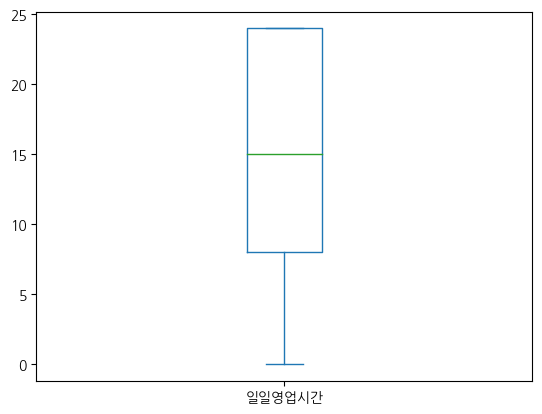

In [73]:
import koreanize_matplotlib
year2020_11['일일영업시간'].plot.box()

In [3]:
year2020_1 = pd.read_excel('2020년 기준 관광산업조사 DATA_PART2_관광산업특수분류 기준.xlsx')
year2021_1 = pd.read_excel('2021년 기준 관광산업조사 DATA PART2 관광산업특수분류 기준.xlsx')

In [4]:
year2020_11 = year2020_1[['TYPE_2','H1_1','H1_2','H1_3','H1_4','H1_5','H1_6','H1_7','H1_8','Q8_2','Q8_3_1','Q8_3_2','Q10_3']] #이상치 없음
year2021_11 = year2021_1[['TYPE_2','H1_1','H1_2','H1_3','H1_4','H1_5','H1_6','H1_7','H1_8','Q8_2','Q8_3_1','Q8_3_2','Q10_3']] #이상치 없음

In [6]:
year2020_11[year2020_11['Q8_2'] != 24]['TYPE_2'].value_counts()/len(year2020_11)   # 4번 관광숙박업, 3번 관광객이용시설업

TYPE_2
6    0.189499
8    0.138209
7    0.048643
5    0.045445
3    0.033973
2    0.027686
4    0.026803
1    0.022281
9    0.000772
Name: count, dtype: float64

In [7]:
year2021_11[year2021_11['Q8_2'] >= 9]['TYPE_2'].value_counts()/len(year2021_11)   # 4번 관광숙박업, 3번 관광객이용시설업

TYPE_2
4    0.327742
8    0.106322
3    0.091876
6    0.035492
5    0.030056
2    0.027105
1    0.013358
7    0.010951
9    0.001243
Name: count, dtype: float64

### 관광업 매출액 분석

In [10]:
import numpy as np

In [11]:
y2021 = year2021_11[year2021_11['Q8_2'] != 24].groupby('TYPE_2').agg({'Q8_2':np.mean, 'Q10_3':np.mean}).sort_values(by='Q8_2')

C:\Users\User\AppData\Local\Temp\ipykernel_11812\1509577875.py:1: FutureWarning: The provided callable <function mean at 0x000001BD08A43820> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  y2021 = year2021_11[year2021_11['Q8_2'] != 24].groupby('TYPE_2').agg({'Q8_2':np.mean, 'Q10_3':np.mean}).sort_values(by='Q8_2')


In [12]:
y2020 = year2020_11[year2020_11['Q8_2'] != 24].groupby('TYPE_2').agg({'Q8_2':np.mean, 'Q10_3':np.mean}).sort_values(by='Q8_2')

C:\Users\User\AppData\Local\Temp\ipykernel_11812\1151813236.py:1: FutureWarning: The provided callable <function mean at 0x000001BD08A43820> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  y2020 = year2020_11[year2020_11['Q8_2'] != 24].groupby('TYPE_2').agg({'Q8_2':np.mean, 'Q10_3':np.mean}).sort_values(by='Q8_2')


In [108]:
year2021_11[year2021_11['Q8_2'] != 24].groupby('TYPE_2').agg({'Q8_2':np.mean, 'Q10_3':np.mean}).sort_values(by='Q8_2')

C:\Users\User\AppData\Local\Temp\ipykernel_11812\187672551.py:1: FutureWarning: The provided callable <function mean at 0x000001BD08A43820> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  year2021_11[year2021_11['Q8_2'] != 24].groupby('TYPE_2').agg({'Q8_2':np.mean, 'Q10_3':np.mean}).sort_values(by='Q8_2')


,Q8_2,Q10_3
TYPE_2,,
6,7.636167,60.849089
7,8.067974,691.324183
1,8.603030,30107.600000
8,8.816506,1655.486831
5,9.191489,613.697872
4,9.283708,647.078652
3,9.923977,1197.742690
2,11.088099,10275.698609
9,16.375000,117302.500000


In [109]:
year2020_11[year2020_11['Q8_2'] != 24].groupby('TYPE_2').agg({'Q8_2':np.mean, 'Q10_3':np.mean}).sort_values(by='Q8_2')

C:\Users\User\AppData\Local\Temp\ipykernel_11812\3374464940.py:1: FutureWarning: The provided callable <function mean at 0x000001BD08A43820> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  year2020_11[year2020_11['Q8_2'] != 24].groupby('TYPE_2').agg({'Q8_2':np.mean, 'Q10_3':np.mean}).sort_values(by='Q8_2')


,Q8_2,Q10_3
TYPE_2,,
6,7.930442,204.121653
7,8.197279,633.317460
1,9.118812,6890.549505
8,9.120511,2373.370311
5,9.461165,582.548544
3,9.889610,648.938312
4,10.921811,724.098765
2,13.087649,23385.525896
9,17.857143,72620.857143


In [153]:
y2020_1 = y2020.loc[[7,1,5,9]]
y2020_2 = y2020.loc[[3]]

y2021_1 = y2021.loc[[7,1,5,9]]
y2021_2 = y2021.loc[[3]]

In [155]:
y2020_1['년도'] = 2020
y2020_2['년도'] = 2020

y2021_1['년도'] = 2021
y2021_2['년도'] = 2021

y2020_1['산업분야'] = ['국제회의업','관광쇼핑업','관광편의시설업','카지노업']
y2020_2['산업분야'] = ['관광객이용시설업']

y2021_1['산업분야'] = ['국제회의업','관광쇼핑업','관광편의시설업','카지노업']
y2021_2['산업분야'] = ['관광객이용시설업']

### 시각화

In [156]:
ss_1 = pd.concat([y2020_1, y2021_1]).reset_index(drop=True)
ss_2 = pd.concat([y2020_2, y2021_2]).reset_index(drop=True)

In [157]:
ss_1 = ss_1.rename(columns={'Q8_2':'일일평균영업시간', 'Q10_3':'연간총매출액_전체(백만원)'})
ss_2 = ss_2.rename(columns={'Q8_2':'일일평균영업시간', 'Q10_3':'연간총매출액_전체(백만원)'})

In [158]:
ss

,일일평균영업시간,연간총매출액_전체(백만원),년도,산업분야
0,8.197279,633.317460,2020,국제회의업
1,9.118812,6890.549505,2020,관광쇼핑업
2,9.461165,582.548544,2020,관광편의시설업
3,9.889610,648.938312,2020,관광객이용시설업
4,17.857143,72620.857143,2020,카지노업
5,8.067974,691.324183,2021,국제회의업
6,8.603030,30107.600000,2021,관광쇼핑업
7,9.191489,613.697872,2021,관광편의시설업
8,9.923977,1197.742690,2021,관광객이용시설업
9,16.375000,117302.500000,2021,카지노업


In [159]:
ss = pd.concat([y2020, y2021]).reset_index(drop=True)
ss = ss.rename(columns={'Q8_2':'일일평균영업시간', 'Q10_3':'연간총매출액_전체(백만원)'})

In [170]:
ss.to_excel('2020~2021 산업분야별 연간총매출액.xlsx', index = False)

In [188]:
y2018 = pd.read_excel('0.종합_18년기준 관광사업체조사.xlsx')
y2019 = pd.read_excel('2019년 기준 관광사업체조사_원자료.xlsx')

In [189]:
y2018 = y2018[['SQ3', 'Q8', 'Q17_W_B']]
y2018 = y2018.rename(columns={'SQ3':'산업분야', 'Q8':'일일평균영업시간', 'Q17_W_B':'연간총매출액_전체(백만원)'})
y2019 = y2019[['SQ3', 'Q8', 'Q17_W_B']]
y2019 = y2019.rename(columns={'SQ3':'산업분야', 'Q8':'일일평균영업시간', 'Q17_W_B':'연간총매출액_전체(백만원)'})

In [190]:
y2018 = y2018[y2018['일일평균영업시간'] != 24].groupby('산업분야').agg({'일일평균영업시간':np.mean, '연간총매출액_전체(백만원)':np.mean}).sort_values(by='일일평균영업시간')
y2019 = y2019[y2019['일일평균영업시간'] != 24].groupby('산업분야').agg({'일일평균영업시간':np.mean, '연간총매출액_전체(백만원)':np.mean}).sort_values(by='일일평균영업시간')

C:\Users\User\AppData\Local\Temp\ipykernel_11812\1880333426.py:1: FutureWarning: The provided callable <function mean at 0x000001BD08A43820> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  y2018 = y2018[y2018['일일평균영업시간'] != 24].groupby('산업분야').agg({'일일평균영업시간':np.mean, '연간총매출액_전체(백만원)':np.mean}).sort_values(by='일일평균영업시간')
C:\Users\User\AppData\Local\Temp\ipykernel_11812\1880333426.py:2: FutureWarning: The provided callable <function mean at 0x000001BD08A43820> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  y2019 = y2019[y2019['일일평균영업시간'] != 24].groupby('산업분야').agg({'일일평균영업시간':np.mean, '연간총매출액_전체(백만원)':np.mean}).sort_values(by='일일평균영업시간')


In [195]:
y2018 = y2018.loc[[7,2]]
y2019 = y2019.loc[[7,2]]

y2018['년도'] = 2018
y2019['년도'] = 2019

y2018['산업분야'] = ['관광편의시설업','관광숙박업']
y2019['산업분야'] = ['관광편의시설업','관광숙박업']

In [198]:
sss = pd.concat([y2018, y2019]).reset_index(drop=True)

In [200]:
sss.to_excel('2018~2019 산업분야별 연간총매출액.xlsx', index = False)

In [ ]:
# 영업시간은 증가, 매출액은 감소     4,1,6   4국체회의업, 1여행업, 6 유원시설업
# 영업시간은 감소, 매출액은 증가     7,2     7관광편의시설업,  2관광숙박업

C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

<Axes: xlabel='산업분야', ylabel='일일평균영업시간'>

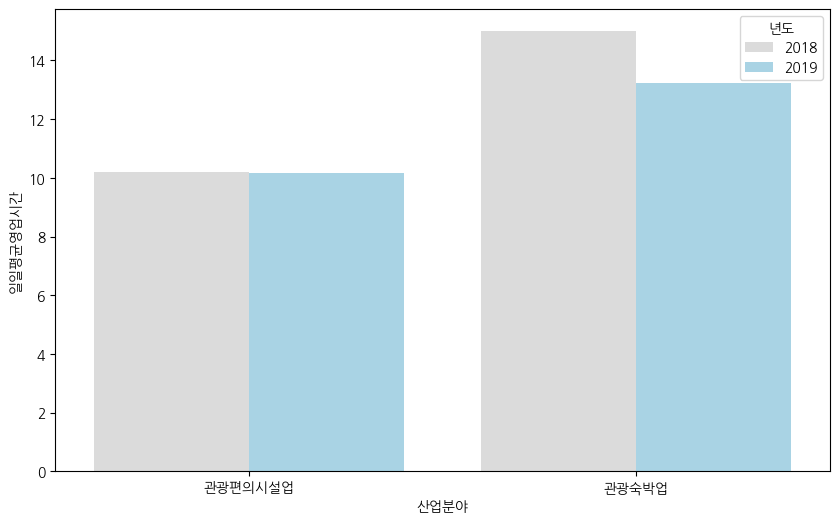

In [206]:
plt.figure(figsize=(10, 6))
sns.barplot(x='산업분야', y='일일평균영업시간', hue='년도', data=sss, dodge=True, palette=['lightgray','skyblue'], alpha=0.8)

C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

<Axes: xlabel='산업분야', ylabel='연간총매출액_전체(백만원)'>

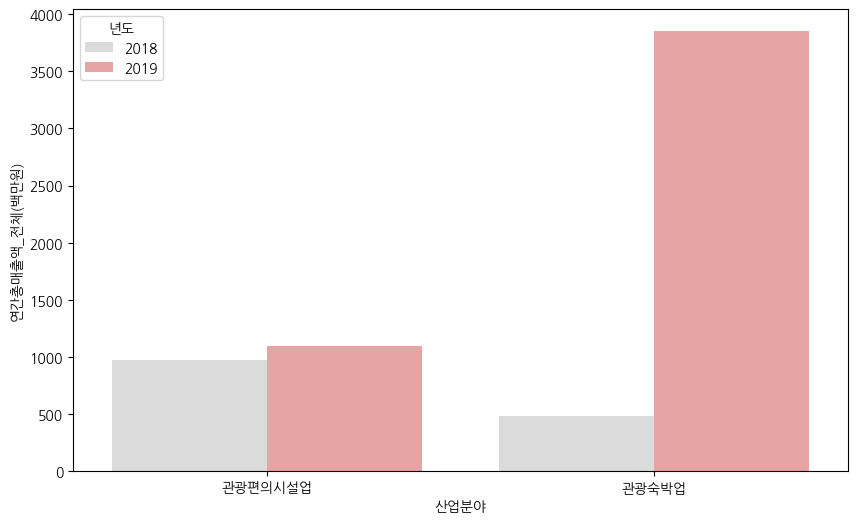

In [204]:
plt.figure(figsize=(10, 6))
sns.barplot(x='산업분야', y='연간총매출액_전체(백만원)', hue='년도', data=sss, dodge=True, palette=['lightgray','lightcoral'], alpha=0.8)

C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

<Axes: xlabel='산업분야', ylabel='일일평균영업시간'>

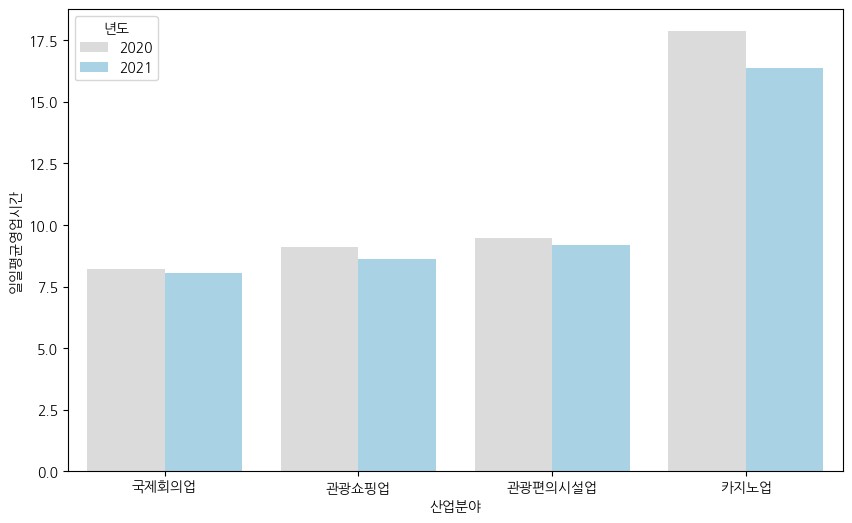

In [161]:
import koreanize_matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x='산업분야', y='일일평균영업시간', hue='년도', data=ss_1, dodge=True, palette=['lightgray','skyblue'], alpha=0.8)

C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

(0.0, 80000.0)

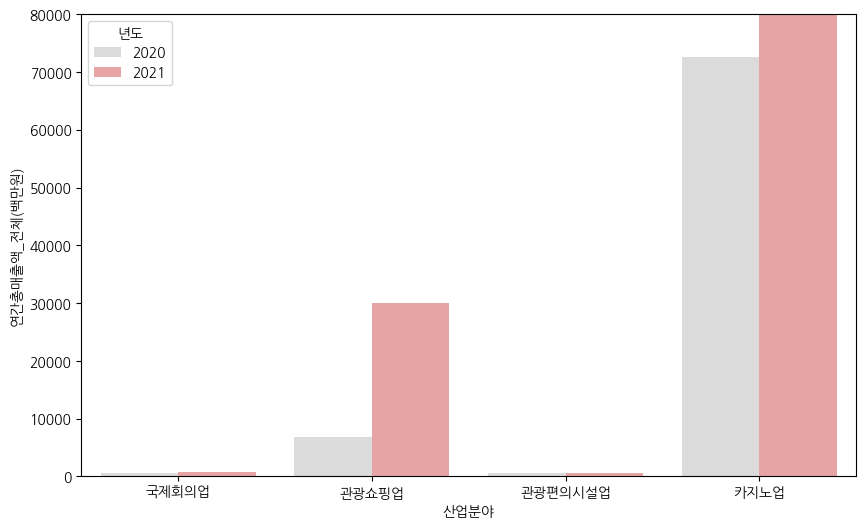

In [167]:
import koreanize_matplotlib

plt.figure(figsize=(10, 6))
sns.barplot(x='산업분야', y='연간총매출액_전체(백만원)', hue='년도', data=ss_1, dodge=True, palette=['lightgray','lightcoral'], alpha=0.8)
plt.ylim(0,80000)

C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

(9.5, 10.0)

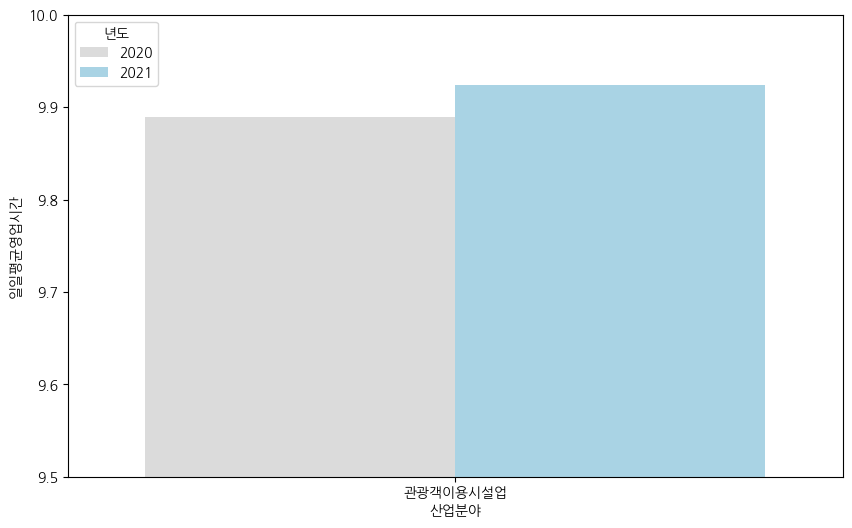

In [163]:
plt.figure(figsize=(10, 6))
sns.barplot(x='산업분야', y='일일평균영업시간', hue='년도', data=ss_2, dodge=True, palette=['lightgray','skyblue'], alpha=0.8)
plt.ylim(9.5,10)

C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

<Axes: xlabel='산업분야', ylabel='연간총매출액_전체(백만원)'>

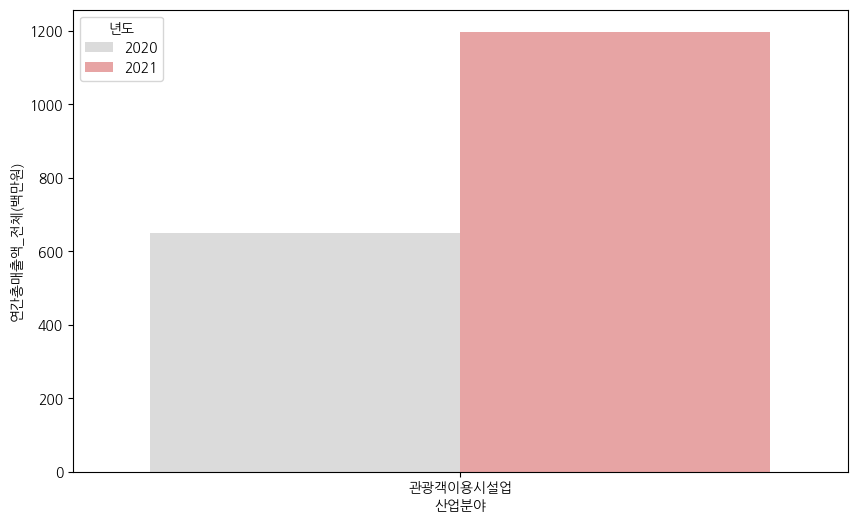

In [164]:
plt.figure(figsize=(10, 6))
sns.barplot(x='산업분야', y='연간총매출액_전체(백만원)', hue='년도', data=ss_2, dodge=True, palette=['lightgray','lightcoral'], alpha=0.8)